In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
sns.set()
from sklearn.cluster import KMeans

In [33]:
df = pd.read_csv('olist_products_dataset.csv')
df.head() # view our dataset after loading

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [34]:
df.head

<bound method NDFrame.head of                              product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  produ

In [38]:
df.shape

(32951, 9)

In [39]:
df['product_category_name'].value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

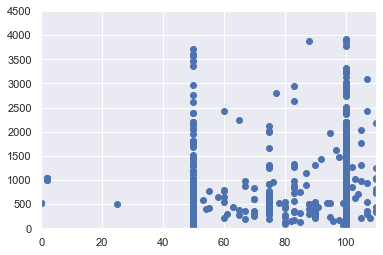

In [99]:
plt.scatter(df['product_weight_g'],df['product_description_lenght'])
plt.xlim(0,110)
plt.ylim(0,4500)
plt.show()

In [41]:
df = df[df['product_description_lenght']>1]

In [42]:
df.shape

(32341, 9)

In [43]:
df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [44]:
df_enc = df[['product_weight_g','product_width_cm']].pivot_table(index=['product_weight_g'], columns=['product_width_cm'], aggfunc=[len], fill_value=0)

In [45]:
def encode(x):
    if x >= 1:
        return 1
    # else
    return 0

In [46]:
df_enc = df_enc.applymap(encode)

In [47]:
df_enc

len                                                        \
product_width_cm 6.0   7.0   8.0   9.0   10.0  11.0  12.0  13.0  14.0  15.0    
product_weight_g                                                               
0.0                  0     0     0     0     0     0     0     0     0     0   
2.0                  0     0     0     0     0     0     0     0     0     0   
25.0                 0     0     0     0     0     0     0     0     0     0   
50.0                 0     0     0     0     0     1     1     1     1     1   
53.0                 0     0     0     0     0     0     0     0     0     0   
...                ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
29700.0              0     0     0     0     0     0     0     0     0     0   
29750.0              0     0     0     0     0     0     0     0     0     0   
29800.0              0     0     0     0     0     0     0     0     0     0   
30000.0              0     0     0     0     0     1     0     0     0     1   
40425.0              0     0     0     0     0     0     0     0     0     0   

                  ...                                                        \
product_width_cm  ... 95.0  97.0  98.0  100.0 101.0 102.0 103.0 104.0 105.0   
product_weight_g  ...                                                         
0.0               ...     0     0     0     0     0     0     0     0     0   
2.0               ...     0     0     0     0     0     0     0     0     0   
25.0              ...     0     0     0     0     0     0     0     0     0   
50.0              ...     0     0     0     0     0     0     0     0     0   
53.0              ...     0     0     0     0     0     0     0     0     0   
...               ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
29700.0           ...     0     0     0     0     0     0     0     0     0   
29750.0           ...     0     0     0     0     0     0     0     0     0   
29800.0           ...     0     0     0     0     0     0     0     0     0   
30000.0           ...     0     0     0     0     0     0     0     0     0   
40425.0           ...     0     0     0     0     0     0     0     0     0   

                        
product_width_cm 118.0  
product_weight_g        
0.0                  0  
2.0                  0  
25.0                 0  
50.0                 0  
53.0                 0  
...                ...  
29700.0              0  
29750.0              0  
29800.0              0  
30000.0              0  
40425.0              0  

[2202 rows x 95 columns]

In [48]:
df_enc[df_enc == 1].sum(axis=1)

product_weight_g
0.0         1.0
2.0         1.0
25.0        1.0
50.0       24.0
53.0        1.0
           ... 
29700.0     2.0
29750.0     1.0
29800.0     1.0
30000.0    43.0
40425.0     1.0
Length: 2202, dtype: float64

In [49]:
df.head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


In [50]:
df_enc = df_enc[(df_enc[df_enc == 1]).sum(axis=1) > 1]
df_enc

len                                                        \
product_width_cm 6.0   7.0   8.0   9.0   10.0  11.0  12.0  13.0  14.0  15.0    
product_weight_g                                                               
50.0                 0     0     0     0     0     1     1     1     1     1   
55.0                 0     0     0     0     0     0     0     0     0     1   
60.0                 0     0     0     0     0     1     0     1     0     1   
65.0                 0     0     0     0     0     1     0     0     0     0   
67.0                 0     0     0     0     0     1     0     0     1     0   
...                ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
28750.0              0     0     0     0     0     0     0     0     0     0   
29500.0              0     0     0     0     0     0     0     0     0     0   
29600.0              0     0     0     0     0     0     0     0     0     0   
29700.0              0     0     0     0     0     0     0     0     0     0   
30000.0              0     0     0     0     0     1     0     0     0     1   

                  ...                                                        \
product_width_cm  ... 95.0  97.0  98.0  100.0 101.0 102.0 103.0 104.0 105.0   
product_weight_g  ...                                                         
50.0              ...     0     0     0     0     0     0     0     0     0   
55.0              ...     0     0     0     0     0     0     0     0     0   
60.0              ...     0     0     0     0     0     0     0     0     0   
65.0              ...     0     0     0     0     0     0     0     0     0   
67.0              ...     0     0     0     0     0     0     0     0     0   
...               ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
28750.0           ...     0     0     0     0     0     0     0     0     0   
29500.0           ...     0     0     0     0     0     0     0     0     0   
29600.0           ...     0     0     0     0     0     0     0     0     0   
29700.0           ...     0     0     0     0     0     0     0     0     0   
30000.0           ...     0     0     0     0     0     0     0     0     0   

                        
product_width_cm 118.0  
product_weight_g        
50.0                 0  
55.0                 0  
60.0                 0  
65.0                 0  
67.0                 0  
...                ...  
28750.0              0  
29500.0              0  
29600.0              0  
29700.0              0  
30000.0              0  

[1143 rows x 95 columns]

In [51]:
X = df.iloc[:,2:5] # 1t for rows and second for columns


In [52]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

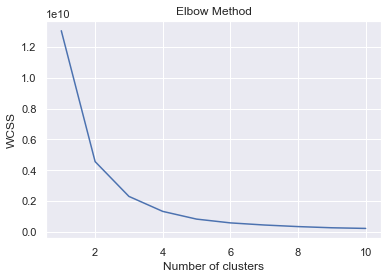

In [54]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

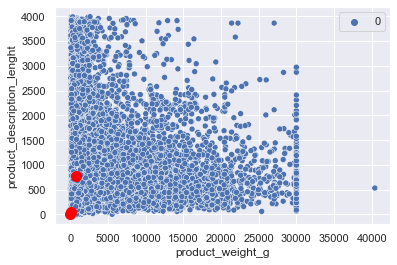

In [98]:
kmeans = KMeans(n_clusters=1, init='k-means++', max_iter=1, n_init=1, random_state=0)
pred_y = kmeans.fit_predict(X)
sns.scatterplot(data=df, x="product_weight_g", y="product_description_lenght", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[0], kmeans.cluster_centers_[0], s=100, c='red')
plt.show()